In [1]:
!pip install geopandas
!pip install pysal==1.14.4.post2

     |████████████████████████████████| 931kB 4.9MB/s 
     |████████████████████████████████| 10.9MB 47.0MB/s 
     |████████████████████████████████| 14.7MB 329kB/s 
     |████████████████████████████████| 17.9MB 255kB/s 
  Created wheel for pysal: filename=PySAL-1.14.4.post2-py2.py3-none-any.whl size=18106151 sha256=38016a797cbb37babc4163e0524880c76bd67ac16593c6fb290034745c7526f7
  Stored in directory: /root/.cache/pip/wheels/43/33/20/65692f75cb30834752a6cb566069d5e98ab209392f24bf5466
Successfully built pysal


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# load libraries
%matplotlib inline
import pandas as pd
from datetime import *
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os
from pysal.esda.mapclassify import Quantiles, Equal_Interval
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [4]:
gdf = gpd.read_file('/content/drive/My Drive/SIG/madeira.shp')
print (gdf)

           CONCELHO                                           geometry
0       PORTO MONIZ  MULTIPOLYGON (((303822.463 3633074.850, 303821...
1        SANTA CRUZ  MULTIPOLYGON (((359638.827 3590876.068, 359638...
2       PORTO SANTO  MULTIPOLYGON (((370956.955 3653243.773, 370956...
3           MACHICO  MULTIPOLYGON (((344464.965 3622248.275, 344474...
4           FUNCHAL  MULTIPOLYGON (((398599.407 3322450.021, 398601...
5      PONTA DO SOL  MULTIPOLYGON (((302730.929 3617578.877, 302734...
6           SANTANA  MULTIPOLYGON (((325434.737 3631751.228, 325432...
7   CÂMARA DE LOBOS  POLYGON ((311996.295 3618002.130, 311999.555 3...
8     RIBEIRA BRAVA  POLYGON ((312848.959 3621452.547, 312849.486 3...
9       SÃO VICENTE  MULTIPOLYGON (((311664.078 3632966.372, 311665...
10          CALHETA  MULTIPOLYGON (((294947.399 3622777.740, 294948...


In [5]:
gdf.head()

,CONCELHO,geometry
0,PORTO MONIZ,"MULTIPOLYGON (((303822.463 3633074.850, 303821..."
1,SANTA CRUZ,"MULTIPOLYGON (((359638.827 3590876.068, 359638..."
2,PORTO SANTO,"MULTIPOLYGON (((370956.955 3653243.773, 370956..."
3,MACHICO,"MULTIPOLYGON (((344464.965 3622248.275, 344474..."
4,FUNCHAL,"MULTIPOLYGON (((398599.407 3322450.021, 398601..."


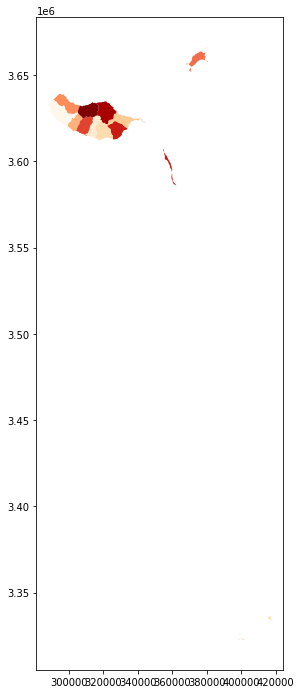

In [6]:
# testing out the data to see how it looks with a cmap
plot = gdf.plot(column='CONCELHO', cmap='OrRd', figsize=(12, 12))

fig = plot.get_figure()

In [7]:
# load in new csv file
df = pd.read_csv("/content/drive/My Drive/SIG/casos_madeira.csv", header=0, encoding="utf-8")

df.head()

,CONCELHO,confirmados_madeira_24/03/2020,confirmados_madeira_25/03/2020,confirmados_madeira_26/03/2020,confirmados_madeira_27/03/2020,confirmados_madeira_28/03/2020,confirmados_madeira_29/03/2020,confirmados_madeira_30/03/2020,confirmados_madeira_31/03/2020,confirmados_madeira_01/04/2020,confirmados_madeira_02/04/2020,confirmados_madeira_03/04/2020,confirmados_madeira_04/04/2020,confirmados_madeira_05/04/2020,confirmados_madeira_06/04/2020,confirmados_madeira_07/04/2020,confirmados_madeira_08/04/2020,confirmados_madeira_09/04/2020,confirmados_madeira_10/04/2020,confirmados_madeira_11/04/2020,confirmados_madeira_12/04/2020,confirmados_madeira_13/04/2020,confirmados_madeira_14/04/2020,confirmados_madeira_15/04/2020,confirmados_madeira_16/04/2020,confirmados_madeira_17/04/2020,confirmados_madeira_18/04/2020,confirmados_madeira_19/04/2020,confirmados_madeira_20/04/2020,confirmados_madeira_21/04/2020,confirmados_madeira_22/04/2020,confirmados_madeira_23/04/2020,confirmados_madeira_24/04/2020,confirmados_madeira_25/04/2020,confirmados_madeira_26/04/2020,confirmados_madeira_27/04/2020,confirmados_madeira_28/04/2020,confirmados_madeira_29/04/2020,confirmados_madeira_30/04/2020,confirmados_madeira_01/05/2020,confirmados_madeira_02/05/2020,confirmados_madeira_03/05/2020,confirmados_madeira_04/05/2020,confirmados_madeira_05/05/2020,confirmados_madeira_06/05/2020,confirmados_madeira_07/05/2020,confirmados_madeira_08/05/2020
0,PORTO MONIZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SANTA CRUZ,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,PORTO SANTO,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0
3,MACHICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FUNCHAL,10.0,10.0,NaN,NaN,16.0,23.0,23.0,18.0,20.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0,21.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,26.0,26.0,26.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,26.0,26.0,26.0,26.0


In [8]:
# filter to include only data labeled as 'Violence Against the Person'
#filtered = df['distrito'] == 'AVEIRO'

#covid19 = df[filtered]

#covid19

df3 = df.groupby('CONCELHO')

df3.head()

,CONCELHO,confirmados_madeira_24/03/2020,confirmados_madeira_25/03/2020,confirmados_madeira_26/03/2020,confirmados_madeira_27/03/2020,confirmados_madeira_28/03/2020,confirmados_madeira_29/03/2020,confirmados_madeira_30/03/2020,confirmados_madeira_31/03/2020,confirmados_madeira_01/04/2020,confirmados_madeira_02/04/2020,confirmados_madeira_03/04/2020,confirmados_madeira_04/04/2020,confirmados_madeira_05/04/2020,confirmados_madeira_06/04/2020,confirmados_madeira_07/04/2020,confirmados_madeira_08/04/2020,confirmados_madeira_09/04/2020,confirmados_madeira_10/04/2020,confirmados_madeira_11/04/2020,confirmados_madeira_12/04/2020,confirmados_madeira_13/04/2020,confirmados_madeira_14/04/2020,confirmados_madeira_15/04/2020,confirmados_madeira_16/04/2020,confirmados_madeira_17/04/2020,confirmados_madeira_18/04/2020,confirmados_madeira_19/04/2020,confirmados_madeira_20/04/2020,confirmados_madeira_21/04/2020,confirmados_madeira_22/04/2020,confirmados_madeira_23/04/2020,confirmados_madeira_24/04/2020,confirmados_madeira_25/04/2020,confirmados_madeira_26/04/2020,confirmados_madeira_27/04/2020,confirmados_madeira_28/04/2020,confirmados_madeira_29/04/2020,confirmados_madeira_30/04/2020,confirmados_madeira_01/05/2020,confirmados_madeira_02/05/2020,confirmados_madeira_03/05/2020,confirmados_madeira_04/05/2020,confirmados_madeira_05/05/2020,confirmados_madeira_06/05/2020,confirmados_madeira_07/05/2020,confirmados_madeira_08/05/2020
0,PORTO MONIZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SANTA CRUZ,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,PORTO SANTO,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0
3,MACHICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FUNCHAL,10.0,10.0,NaN,NaN,16.0,23.0,23.0,18.0,20.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0,21.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,26.0,26.0,26.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,26.0,26.0,26.0,26.0
5,PONTA DO SOL,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,SANTANA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CÂMARA DE LOBOS,3.0,3.0,NaN,NaN,4.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0,18.0,34.0,35.0,35.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,35.0,35.0,35.0,35.0,38.0,38.0
8,RIBEIRA BRAVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SÃO VICENTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df1 = df.rename(columns={'confirmados_madeira_24/03/2020': '24-03-2020', 'confirmados_madeira_25/03/2020': '25-03-2020',
                  'confirmados_madeira_26/03/2020': '26-03-2020', 'confirmados_madeira_27/03/2020': '27-03-2020', 
                   'confirmados_madeira_28/03/2020': '28-03-2020', 'confirmados_madeira_29/03/2020': '29-03-2020',
                  'confirmados_madeira_30/03/2020': '30-03-2020', 'confirmados_madeira_31/03/2020': '31-03-2020',
                  'confirmados_madeira_01/04/2020': '01-04-2020', 'confirmados_madeira_02/04/2020':'02-04-2020',
                   'confirmados_madeira_03/04/2020':'03-04-2020', 'confirmados_madeira_04/04/2020': '04-04-2020', 
                  'confirmados_madeira_05/04/2020':'05-04-2020', 'confirmados_madeira_06/04/2020':'06-04-2020', 
                   'confirmados_madeira_07/04/2020': '07-04-2020', 'confirmados_madeira_08/04/2020': '08-04-2020', 
                   'confirmados_madeira_09/04/2020': '09-04-2020', 'confirmados_madeira_10/04/2020':'10-04-2020',
                  'confirmados_madeira_11/04/2020':'11-04-2020', 'confirmados_madeira_12/04/2020':'12-04-2020', 
                  'confirmados_madeira_13/04/2020':'13-04-2020', 'confirmados_madeira_14/04/2020':'14-04-2020',
                  'confirmados_madeira_15/04/2020':'15-04-2020', 'confirmados_madeira_16/04/2020':'16-04-2020',
                  'confirmados_madeira_17/04/2020':'17-04-2020', 'confirmados_madeira_18/04/2020':'18-04-2020',
                  'confirmados_madeira_19/04/2020':'19-04-2020', 'confirmados_madeira_20/04/2020':'20-04-2020', 
                  'confirmados_madeira_21/04/2020':'21-04-2020', 'confirmados_madeira_22/04/2020':'22-04-2020',
                  'confirmados_madeira_23/04/2020':'23-04-2020', 'confirmados_madeira_24/04/2020':'24-04-2020',
                  'confirmados_madeira_25/04/2020':'25-04-2020', 'confirmados_madeira_26/04/2020':'26-04-2020',
                  'confirmados_madeira_27/04/2020':'27-04-2020', 'confirmados_madeira_28/04/2020':'28-04-2020',
                  'confirmados_madeira_29/04/2020':'29-04-2020', 'confirmados_madeira_30/04/2020':'30-04-2020',
                  'confirmados_madeira_01/05/2020':'01-05-2020', 'confirmados_madeira_02/05/2020':'02-05-2020', 
                  'confirmados_madeira_03/05/2020':'03-05-2020', 'confirmados_madeira_04/05/2020':'04-05-2020',
                  'confirmados_madeira_06/05/2020':'06-05-2020', 'confirmados_madeira_05/05/2020':'05-05-2020',
                  'confirmados_madeira_07/05/2020':'07-05-2020', 'confirmados_madeira_08/05/2020':'08-05-2020'})

In [10]:
df1.fillna(0)

,CONCELHO,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020
0,PORTO MONIZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SANTA CRUZ,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,PORTO SANTO,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0
3,MACHICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FUNCHAL,10.0,10.0,0.0,0.0,16.0,23.0,23.0,18.0,20.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0,21.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,26.0,26.0,26.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,26.0,26.0,26.0,26.0
5,PONTA DO SOL,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,SANTANA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,CÂMARA DE LOBOS,3.0,3.0,0.0,0.0,4.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0,18.0,34.0,35.0,35.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,35.0,35.0,35.0,35.0,38.0,38.0
8,RIBEIRA BRAVA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SÃO VICENTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# then we need to melt the df so it's in tidy format. reshape the table to keep the columns borough, category, year (as variable) and value
melted = pd.melt(df1,  id_vars=['CONCELHO'], var_name='data', value_name='nofcases')
melted = melted.fillna(0)

In [12]:
melted.head()

,CONCELHO,data,nofcases
0,PORTO MONIZ,24-03-2020,0.0
1,SANTA CRUZ,24-03-2020,0.0
2,PORTO SANTO,24-03-2020,0.0
3,MACHICO,24-03-2020,0.0
4,FUNCHAL,24-03-2020,10.0


In [13]:
df2 = melted.groupby('CONCELHO')

df2.head()

,CONCELHO,data,nofcases
0,PORTO MONIZ,24-03-2020,0.0
1,SANTA CRUZ,24-03-2020,0.0
2,PORTO SANTO,24-03-2020,0.0
3,MACHICO,24-03-2020,0.0
4,FUNCHAL,24-03-2020,10.0
5,PONTA DO SOL,24-03-2020,0.0
6,SANTANA,24-03-2020,0.0
7,CÂMARA DE LOBOS,24-03-2020,3.0
8,RIBEIRA BRAVA,24-03-2020,0.0
9,SÃO VICENTE,24-03-2020,0.0


In [14]:
# then let's pivot the dataframe to add on the column 'major_category' and add up the values for each borough by year
covid = melted.pivot_table(values='nofcases', index=['CONCELHO'], columns='data', aggfunc=np.sum)
covid.columns = covid.columns.get_level_values(0)
covid.head()

data,01-04-2020,01-05-2020,02-04-2020,02-05-2020,03-04-2020,03-05-2020,04-04-2020,04-05-2020,05-04-2020,05-05-2020,06-04-2020,06-05-2020,07-04-2020,07-05-2020,08-04-2020,08-05-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-03-2020,24-04-2020,25-03-2020,25-04-2020,26-03-2020,26-04-2020,27-03-2020,27-04-2020,28-03-2020,28-04-2020,29-03-2020,29-04-2020,30-03-2020,30-04-2020,31-03-2020
CONCELHO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CALHETA,5.0,5.0,5.0,5.0,5.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,3.0,4.0,6.0,5.0
CÂMARA DE LOBOS,7.0,34.0,7.0,34.0,7.0,35.0,7.0,35.0,7.0,35.0,7.0,35.0,7.0,38.0,7.0,38.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0,18.0,34.0,35.0,35.0,34.0,3.0,34.0,3.0,34.0,0.0,34.0,0.0,34.0,4.0,34.0,6.0,34.0,6.0,34.0,6.0
FUNCHAL,20.0,30.0,20.0,30.0,20.0,30.0,20.0,30.0,20.0,26.0,21.0,26.0,21.0,26.0,21.0,26.0,21.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,26.0,26.0,26.0,30.0,30.0,30.0,10.0,30.0,10.0,30.0,0.0,30.0,0.0,30.0,16.0,30.0,23.0,30.0,23.0,30.0,18.0
MACHICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PONTA DO SOL,5.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0,6.0,5.0


In [15]:
# join the geodataframe with the cleaned up csv dataframe
merged1 = gdf.set_index('CONCELHO').join(covid)

merged1 = merged1.reindex(merged1.index.rename('CONCELHO'))

merged1.max

<bound method DataFrame.max of                                                           geometry  ...  31-03-2020
CONCELHO                                                            ...            
PORTO MONIZ      MULTIPOLYGON (((303822.463 3633074.850, 303821...  ...         0.0
SANTA CRUZ       MULTIPOLYGON (((359638.827 3590876.068, 359638...  ...         4.0
PORTO SANTO      MULTIPOLYGON (((370956.955 3653243.773, 370956...  ...         0.0
MACHICO          MULTIPOLYGON (((344464.965 3622248.275, 344474...  ...         0.0
FUNCHAL          MULTIPOLYGON (((398599.407 3322450.021, 398601...  ...        18.0
PONTA DO SOL     MULTIPOLYGON (((302730.929 3617578.877, 302734...  ...         5.0
SANTANA          MULTIPOLYGON (((325434.737 3631751.228, 325432...  ...         0.0
CÂMARA DE LOBOS  POLYGON ((311996.295 3618002.130, 311999.555 3...  ...         6.0
RIBEIRA BRAVA    POLYGON ((312848.959 3621452.547, 312849.486 3...  ...         0.0
SÃO VICENTE      MULTIPOLYGON (((311664.078 3

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

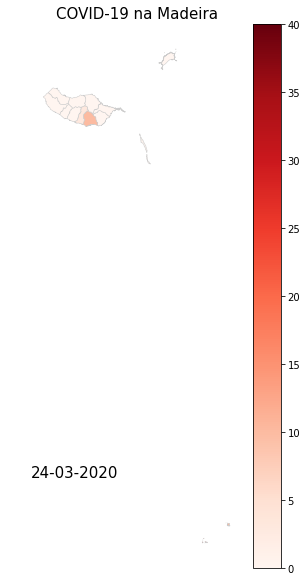

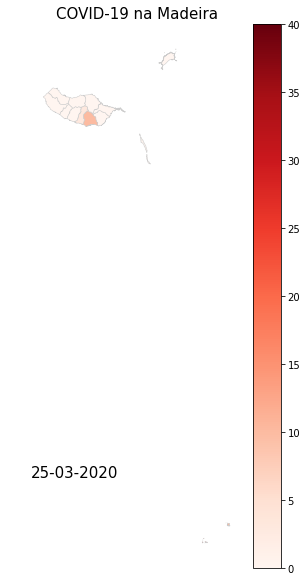

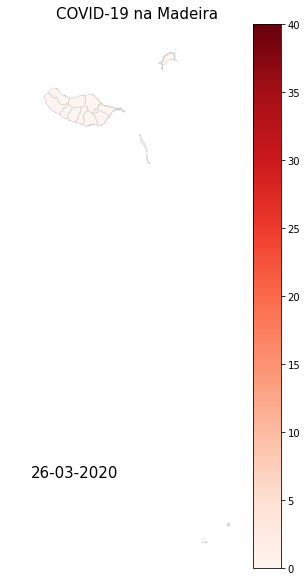

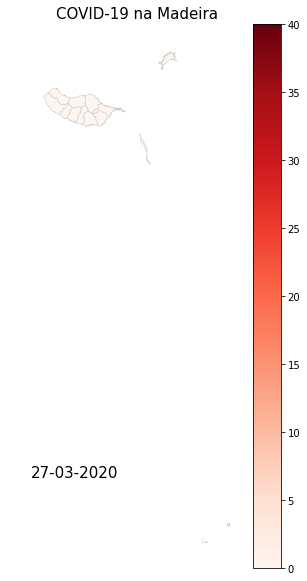

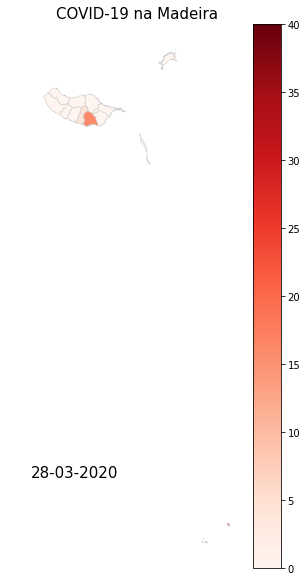

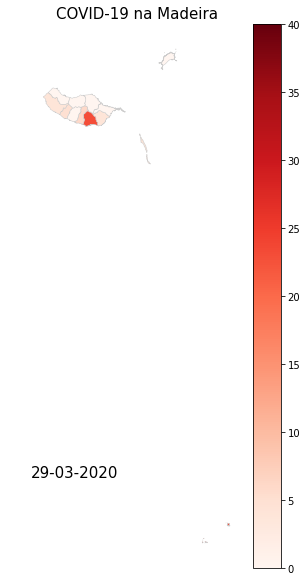

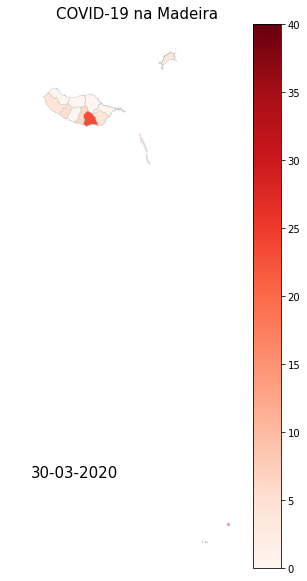

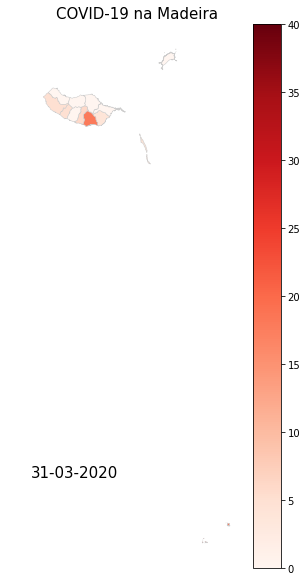

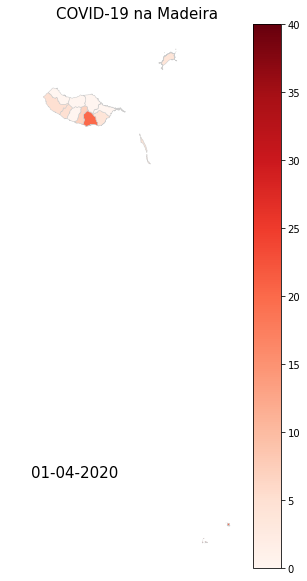

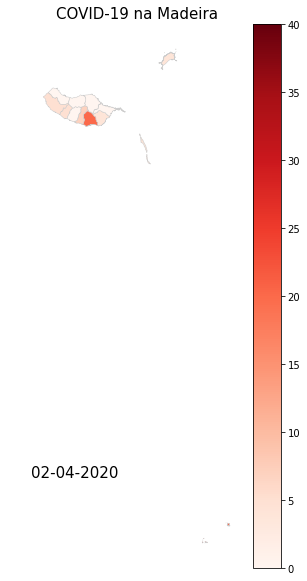

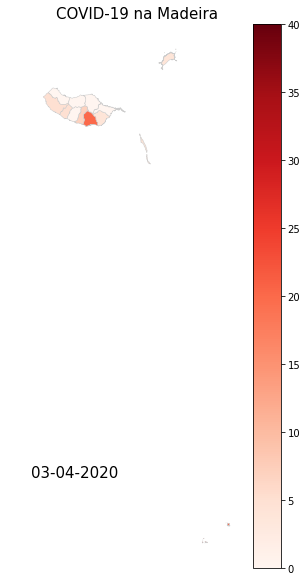

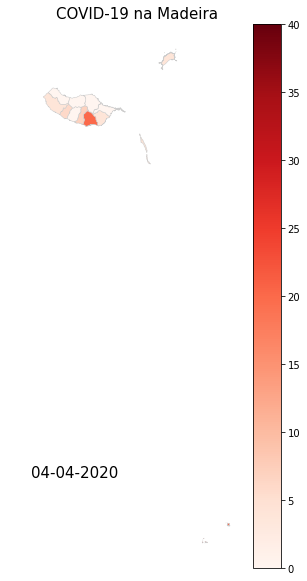

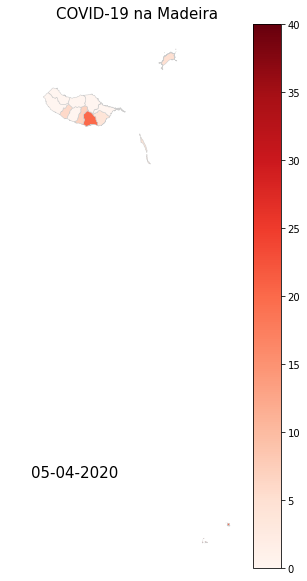

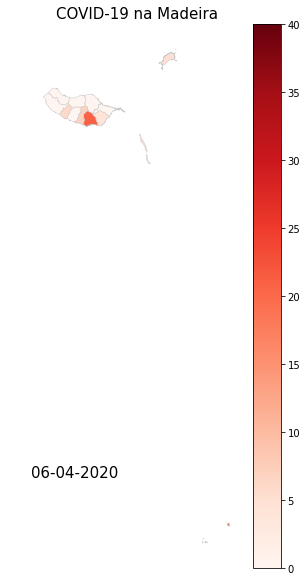

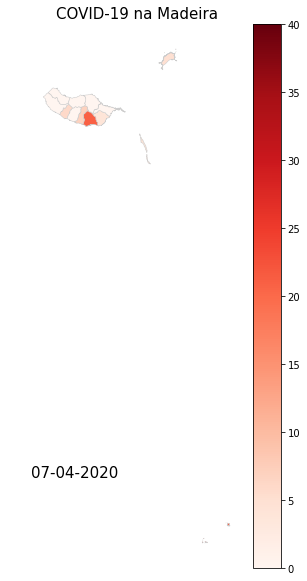

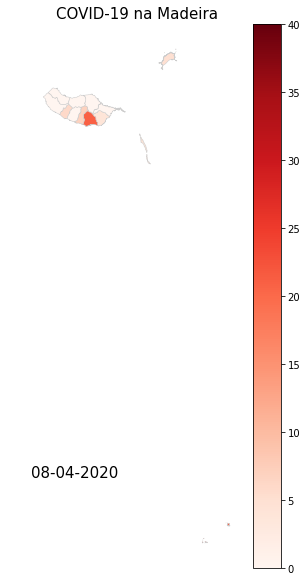

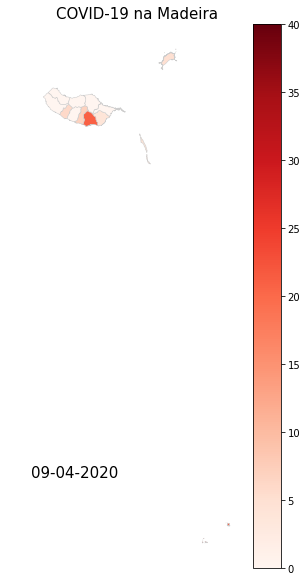

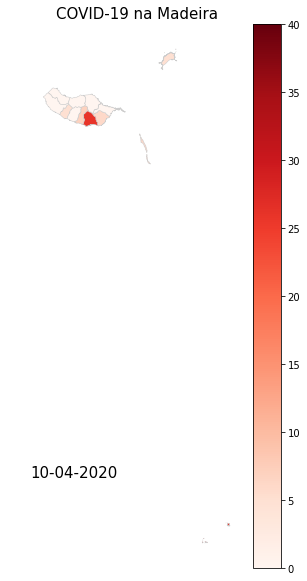

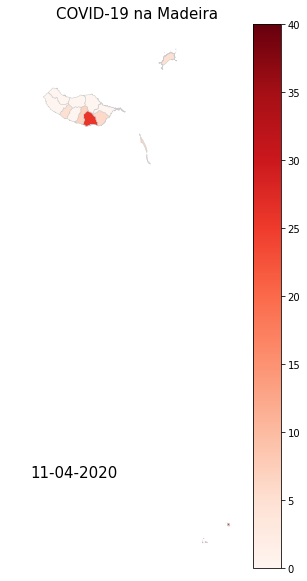

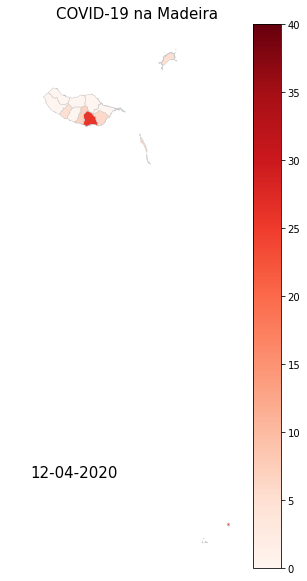

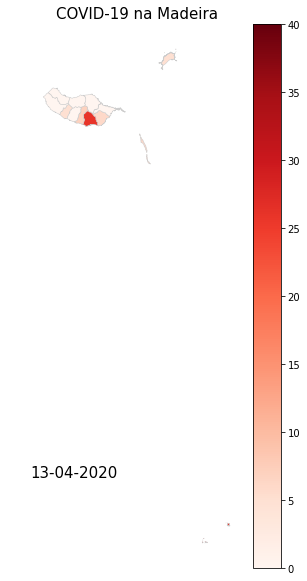

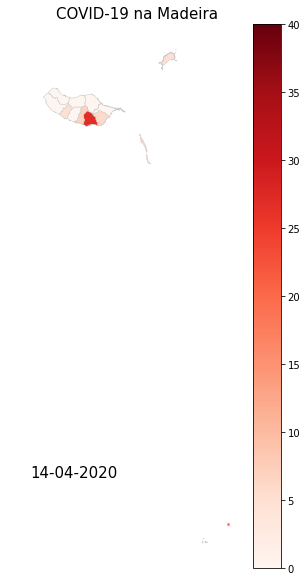

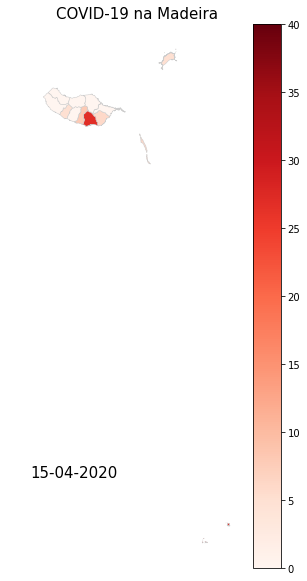

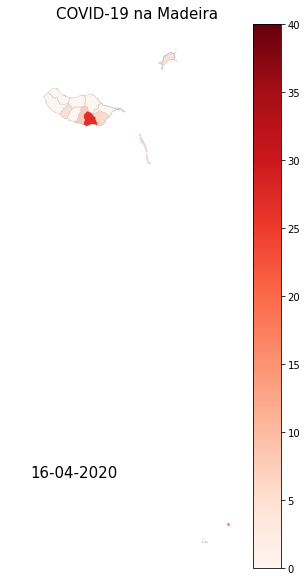

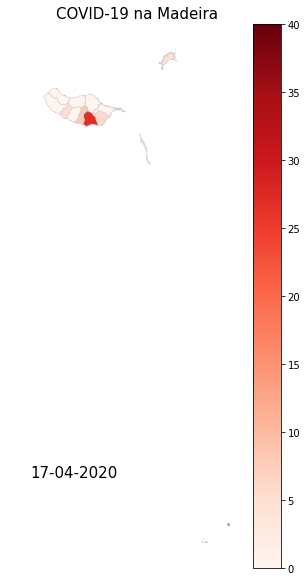

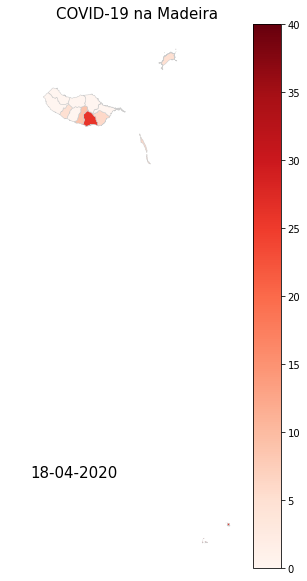

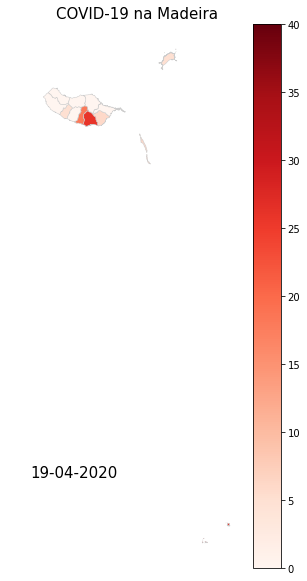

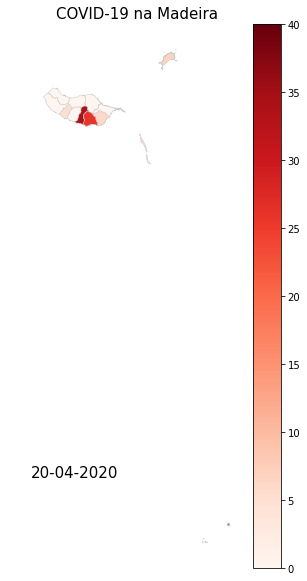

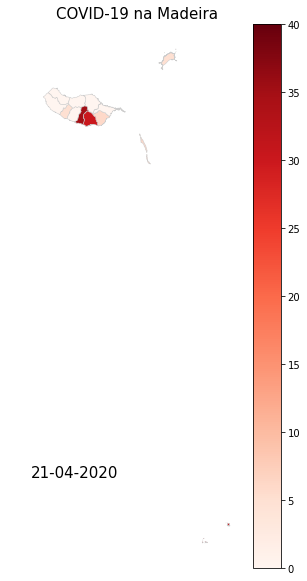

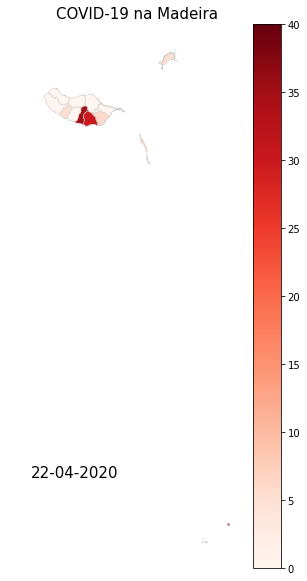

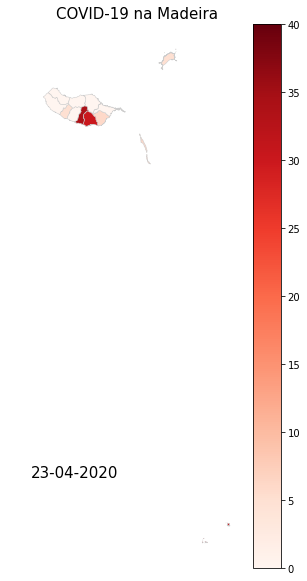

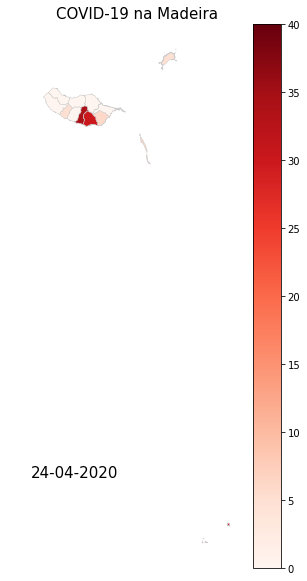

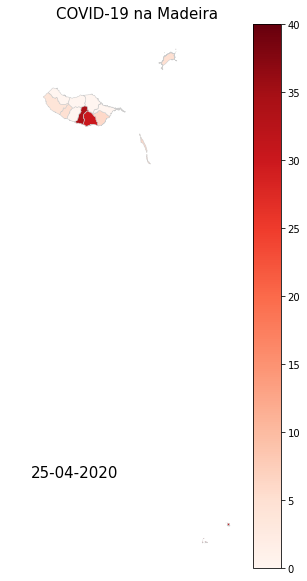

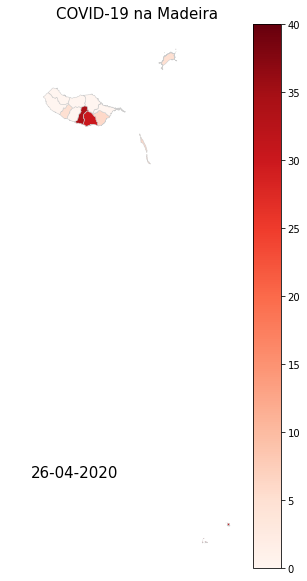

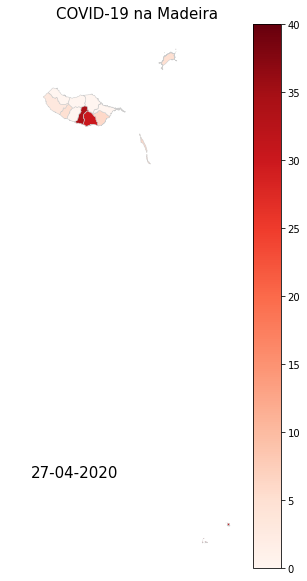

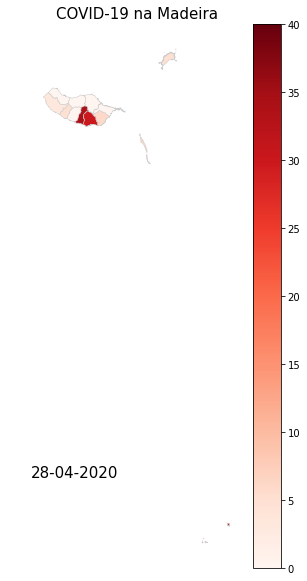

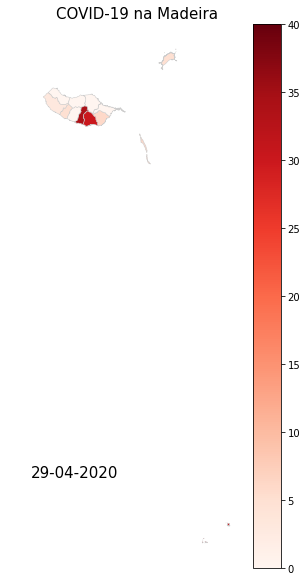

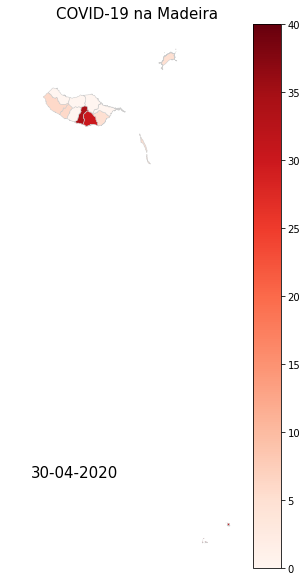

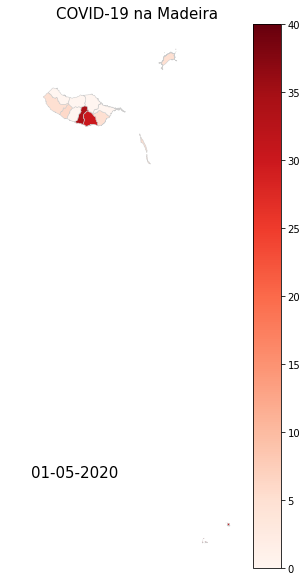

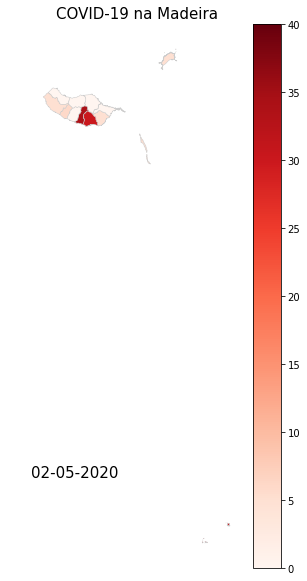

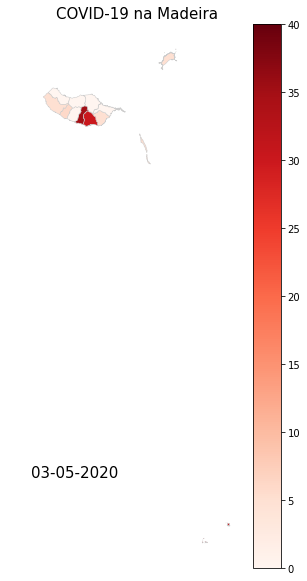

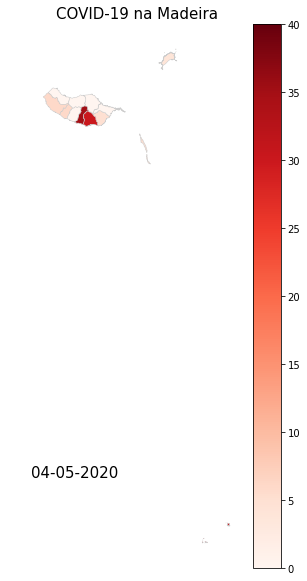

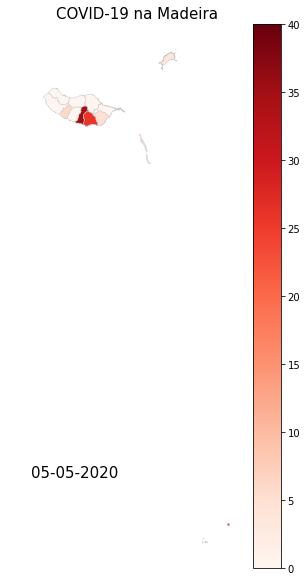

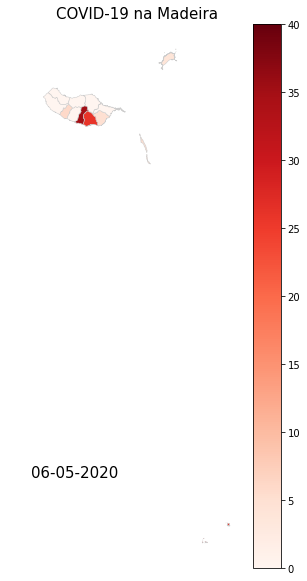

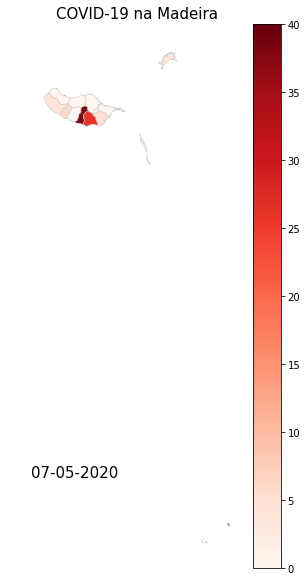

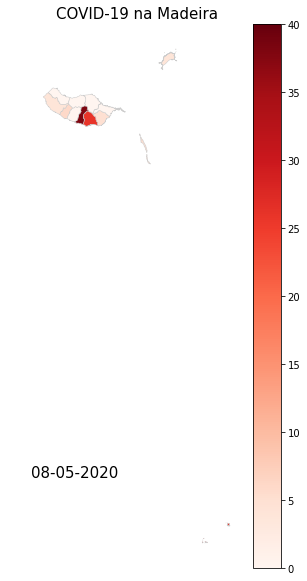

In [16]:
# CREATE A LOOP TO MAKE MULTIPLE MAPS WITH YEAR ANNOTATIONS

# save all the maps in the charts folder
output_path = '/content/drive/My Drive/SIG/charts/maps_madeira'

# counter for the for loop
i = 0

# list of days (which are the column names at the moment)
list_of_days = ['24-03-2020', '25-03-2020',
                  '26-03-2020', '27-03-2020', 
                  '28-03-2020', '29-03-2020',
                 '30-03-2020', '31-03-2020',
                  '01-04-2020', '02-04-2020',
                  '03-04-2020',  '04-04-2020', 
                  '05-04-2020', '06-04-2020', 
                   '07-04-2020', '08-04-2020', 
                   '09-04-2020', '10-04-2020',
                 '11-04-2020', '12-04-2020', 
                  '13-04-2020', '14-04-2020',
                  '15-04-2020', '16-04-2020',
                 '17-04-2020', '18-04-2020',
                 '19-04-2020', '20-04-2020', 
                  '21-04-2020', '22-04-2020',
                 '23-04-2020', '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020', '28-04-2020', '29-04-2020', 
                '30-04-2020', '01-05-2020',
                '02-05-2020', '03-05-2020', '04-05-2020', '05-05-2020', '06-05-2020', '07-05-2020', '08-05-2020']

# set the min and max range for the choropleth map
vmin, vmax = 0, 40

# start the for loop to create one map per year
for day in list_of_days:
    
    # create map
    fig = merged1.plot(column=day, cmap='Reds', figsize=(5,10), linewidth=0.5, edgecolor='0.8', vmin=0, vmax=40, legend=True) 
    
    # UDPATE: added plt.Normalize to keep the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('COVID-19 na Madeira', \
              fontdict={'fontsize': '15',
                         'fontweight' : '3'})
    
    # create an annotation for the day
    #only_day = (datetime.strptime(day, '%Y-%m-%d'))
    
    # position the annotation to the bottom left
    fig.annotate(day,
            xy=(0.1, .2), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, day+'_covid.png')
    only_day = (datetime.strptime(day, '%d-%m-%Y')+ timedelta(days=1)).strftime('%d-%m-%Y')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)